In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import NMF, LatentDirichletAllocation
from gensim import corpora, models

import nltk

This list represents an index of 6300 books from Gutenberg. The order is a potential problem, 
so randomly select 50 books from the set to train on. 

In [ ]:
total_book_list = [4, 6, 8, 9, 11, 12, 13, 18, 19, 20, 24, 26, 27, 32, 33, 35, 36, 41, 42, 43, 44, 45, 46, 47, 50, 51, 54, 55, 58, 62, 64, 68, 70, 71, 72, 74, 76, 77, 78, 81, 82, 83, 84, 85, 86, 90, 91, 92, 93, 94, 95, 96, 98, 102, 103, 106, 107, 108, 110, 113, 119, 120, 122, 123, 126, 127, 128, 130, 132, 135, 136, 137, 139, 140, 142, 143, 145, 146, 147, 149, 153, 154, 155, 157, 159, 163, 164, 166, 168, 170, 172, 173, 175, 176, 177, 178, 179, 204, 205, 208, 209, 210, 211, 213, 214, 215, 221, 223, 224, 225, 236, 241, 242, 243, 244, 245, 261, 263, 264, 267, 269, 278, 280, 281, 283, 284, 285, 288, 290, 294, 295, 304, 305, 306, 307, 308, 310, 311, 313, 314, 316, 318, 319, 322, 323, 325, 326, 327, 329, 330, 331, 332, 333, 334, 335, 342, 343, 344, 345, 346, 354, 355, 356, 358, 363, 364, 365, 366, 368, 369, 370, 371, 372, 373, 374, 375, 376, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 393, 394, 396, 397, 398, 400, 403, 404, 405, 407, 411, 413, 415, 416, 419, 420, 421, 422, 423, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 436, 438, 439, 441, 442, 446, 456, 457, 458, 459, 460, 464, 465, 469, 470, 471, 472, 476, 478, 479, 482, 484, 485, 486, 487, 492, 497, 498, 499, 502, 503, 504, 505, 506, 507, 508, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 524, 529, 534, 535, 536, 537, 538, 540, 541, 543, 544, 545, 547, 550, 551, 552, 553, 555, 556, 557, 558, 559, 560, 561, 562, 564, 565, 575, 577, 580, 583, 587, 588, 589, 591, 596, 599, 600, 601, 603, 604, 605, 606, 608, 611, 614, 616, 619, 620, 621, 622, 623, 627, 636, 637, 640, 641, 642, 643, 644, 645, 646, 647, 648, 650, 651, 652, 653, 674, 675, 676, 678, 688, 689, 690, 691, 692, 697, 698, 699, 700, 704, 706, 707, 708, 709, 710, 711, 713, 714, 715, 716, 718, 719, 721, 723, 724, 725, 726, 727, 728, 730, 737, 738, 739, 741, 742, 744, 746, 747, 748, 751, 753, 755, 762, 763, 765, 766, 770, 772, 775, 776, 777, 778, 780, 783, 786, 788, 793, 794, 805, 807, 808, 809, 810, 814, 815, 816, 818, 819, 820, 821, 824, 829, 832, 834, 836, 837, 838, 839, 840, 841, 843, 845, 846, 848, 849, 851, 855, 856, 857, 858, 861, 864, 865, 866, 867, 868, 869, 870, 872, 874, 876, 877, 880, 882, 883, 884, 888, 897, 898, 899, 903, 906, 907, 908, 910, 911, 912, 913, 914, 916, 917, 918, 922, 923, 924, 927, 928, 932, 935, 936, 938, 939, 940, 942, 943, 944, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 967, 968, 972, 973, 976, 977, 983, 985, 986, 1013, 1014, 1020, 1022, 1023, 1024, 1025, 1027, 1029, 1032, 1033, 1035, 1036, 1038, 1040, 1041, 1042, 1044, 1045, 1046, 1047, 1048, 1050, 1054, 1056, 1059, 1060, 1062, 1074, 1075, 1078, 1080, 1081, 1082, 1086, 1088, 1089, 1090, 1093, 1095, 1096, 1097, 1099, 1138, 1139, 1144, 1145, 1146, 1147, 1149, 1153, 1156, 1157, 1159, 1160, 1161, 1162, 1163, 1164, 1168, 1182, 1183, 1187, 1188, 1189, 1190, 1193, 1195, 1196, 1197, 1198, 1203, 1204, 1206, 1207, 1208, 1209, 1213, 1214, 1215, 1217, 1219, 1220, 1221, 1223, 1227, 1228, 1230, 1231, 1237, 1238, 1239, 1242, 1248, 1261, 1262, 1263, 1264, 1268, 1269, 1270, 1271, 1277, 1278, 1281, 1282, 1283, 1284, 1285, 1289, 1294, 1297, 1299, 1300, 1302, 1305, 1307, 1312, 1313, 1314, 1315, 1317, 1319, 1321, 1323, 1324, 1326, 1331, 1332, 1333, 1334, 1340, 1343, 1344, 1345, 1348, 1349, 1350, 1352, 1353, 1354, 1355, 1356, 1357, 1361, 1362, 1363, 1364, 1365, 1366, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1380, 1381, 1382, 1383, 1389, 1391, 1392, 1393, 1394, 1395, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1413, 1414, 1415, 1416, 1417, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1431, 1432, 1433, 1435, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1447, 1449, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1465, 1467, 1470, 1472, 1473, 1474, 1475, 1477, 1481, 1482, 1487, 1491, 1492, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1550, 1551, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1561, 1562, 1564, 1567, 1569, 1577, 1583, 1585, 1586, 1587, 1588, 1590, 1594, 1595, 1596, 1597, 1601, 1603, 1604, 1605, 1606, 1607, 1614, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1633, 1638, 1639, 1640, 1641, 1644, 1645, 1646, 1649, 1651, 1652, 1654, 1655, 1659, 1660, 1661, 1667, 1668, 1669, 1671, 1675, 1678, 1680, 1683, 1684, 1685, 1686, 1688, 1690, 1692, 1693, 1695, 1696, 1698, 1699, 1700, 1701, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1713, 1714, 1715, 1717, 1718, 1719, 1720, 1721, 1723, 1724, 1729, 1730, 1732, 1733, 1734, 1737, 1740, 1742, 1743, 1745, 1746, 1747, 1748, 1749, 1751, 1753, 1754, 1755, 1756, 1760, 1761, 1762, 1763, 1764, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1826, 1827, 1828, 1832, 1833, 1834, 1835, 1836, 1837, 1841, 1842, 1843, 1846, 1848, 1849, 1850, 1852, 1853, 1854, 1855, 1856, 1858, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1873, 1874, 1878, 1880, 1881, 1882, 1883, 1884, 1887, 1889, 1892, 1895, 1898, 1899, 1901, 1902, 1905, 1907, 1908, 1912, 1913, 1915, 1916, 1917, 1918, 1921, 1923, 1924, 1925, 1926, 1927, 1928, 1931, 1933, 1935, 1936, 1937, 1938, 1940, 1941, 1942, 1943, 1944, 1947, 1950, 1952, 1953, 1954, 1955, 1957, 1960, 1961, 1963, 1965, 1966, 1967, 1968, 1969, 1970, 1973, 1975, 1976, 1985, 1990, 1991, 1993, 1994, 2004, 2005, 2006, 2009, 2010, 2011, 2015, 2018, 2019, 2020, 2022, 2023, 2024, 2028, 2033, 2034, 2036, 2037, 2039, 2042, 2044, 2046, 2048, 2050, 2051, 2052, 2055, 2057, 2060, 2063, 2064, 2066, 2068, 2070, 2072, 2073, 2081, 2082, 2083, 2087, 2088, 2089, 2095, 2097, 2098, 2125, 2126, 2129, 2130, 2134, 2138, 2140, 2141, 2142, 2145, 2147, 2148, 2149, 2150, 2151, 2152, 2153, 2154, 2155, 2157, 2158, 2159, 2163, 2164, 2165, 2166, 2171, 2175, 2177, 2178, 2179, 2180, 2181, 2182, 2183, 2184, 2185, 2186, 2192, 2193, 2195, 2197, 2225, 2226, 2227, 2231, 2232, 2233, 2234, 2235, 2236, 2237, 2238, 2239, 2240, 2241, 2242, 2243, 2244, 2245, 2246, 2247, 2248, 2249, 2250, 2251, 2252, 2253, 2254, 2255, 2256, 2257, 2258, 2259, 2260, 2261, 2262, 2263, 2264, 2265, 2266, 2267, 2268, 2269, 2270, 2271, 2272, 2273, 2274, 2275, 2276, 2277, 2278, 2279, 2280, 2281, 2282, 2283, 2284, 2285, 2286, 2287, 2289, 2291, 2295, 2296, 2297, 2298, 2299, 2300, 2301, 2302, 2307, 2309, 2310, 2315, 2316, 2318, 2324, 2325, 2327, 2328, 2329, 2334, 2343, 2344, 2345, 2346, 2347, 2348, 2349, 2350, 2353, 2354, 2355, 2356, 2358, 2360, 2366, 2368, 2369, 2370, 2372, 2373, 2377, 2381, 2385, 2389, 2391, 2392, 2393, 2394, 2395, 2396, 2398, 2399, 2415, 2416, 2417, 2422, 2425, 2426, 2427, 2429, 2430, 2431, 2432, 2433, 2434, 2435, 2436, 2437, 2438, 2440, 2444, 2446, 2448, 2449, 2450, 2451, 2452, 2453, 2454, 2455, 2459, 2460, 2463, 2467, 2471, 2472, 2473, 2479, 2482, 2483, 2485, 2488, 2495, 2496, 2497, 2498, 2501, 2502, 2506, 2507, 2508, 2511, 2512, 2514, 2516, 2518, 2520, 2521, 2522, 2523, 2524, 2525, 2529, 2530, 2531, 2532, 2533, 2534, 2535, 2537, 2539, 2541, 2542, 2544, 2545, 2546, 2547, 2548, 2549, 2550, 2551, 2552, 2554, 2555, 2556, 2559, 2560, 2561, 2562, 2563, 2566, 2567, 2569, 2570, 2571, 2572, 2574, 2589, 2590, 2594, 2596, 2597, 2598, 2599, 2600, 2602, 2604, 2605, 2607, 2608, 2610, 2611, 2618, 2619, 2620, 2621, 2622, 2627, 2628, 2629, 2630, 2631, 2632, 2633, 2634, 2635, 2636, 2637, 2638, 2639, 2640, 2641, 2642, 2645, 2646, 2648, 2649, 2651, 2652, 2653, 2654, 2655, 2656, 2657, 2658, 2659, 2661, 2662, 2665, 2666, 2667, 2671, 2672, 2673, 2674, 2675, 2676, 2683, 2684, 2686, 2687, 2688, 2689, 2690, 2691, 2692, 2695, 2696, 2697, 2698, 2699, 2700, 2702, 2703, 2705, 2711, 2712, 2713, 2714, 2715, 2716, 2717, 2718, 2719, 2720, 2721, 2722, 2723, 2726, 2727, 2728, 2729, 2730, 2731, 2732, 2733, 2736, 2739, 2740, 2761, 2762, 2763, 2764, 2765, 2767, 2768, 2769, 2771, 2772, 2773, 2774, 2775, 2776, 2777, 2781, 2783, 2784, 2786, 2787, 2788, 2789, 2792, 2793, 2794, 2796, 2797, 2798, 2799, 2801, 2804, 2806, 2807, 2813, 2814, 2815, 2816, 2817, 2818, 2819, 2821, 2823, 2828, 2829, 2830, 2832, 2833, 2834, 2836, 2841, 2842, 2843, 2844, 2845, 2851, 2852, 2853, 2855, 2856, 2857, 2858, 2859, 2860, 2861, 2862, 2863, 2864, 2865, 2867, 2869, 2870, 2871, 2872, 2874, 2875, 2876, 2883, 2884, 2886, 2891, 2892, 2893, 2895, 2897, 2898, 2901, 2902, 2903, 2904, 2905, 2906, 2907, 2908, 2909, 2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919, 2920, 2921, 2922, 2923, 2924, 2925, 2926, 2927, 2928, 2929, 2930, 2931, 2932, 2933, 2934, 2935, 2936, 2937, 2938, 2939, 2940, 2943, 2946, 2948, 2950, 2982, 2983, 2984, 2985, 2986, 2987, 2988, 2990, 2993, 2994, 2996, 2997, 3003, 3004, 3005, 3006, 3011, 3012, 3013, 3014, 3015, 3016, 3027, 3028, 3029, 3030, 3031, 3035, 3039, 3041, 3044, 3045, 3046, 3047, 3049, 3050, 3051, 3054, 3056, 3058, 3067, 3069, 3070, 3075, 3091, 3093, 3094, 3095, 3096, 3097, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3129, 3130, 3131, 3132, 3133, 3134, 3135, 3137, 3138, 3140, 3145, 3146, 3147, 3148, 3149, 3153, 3155, 3157, 3159, 3162, 3163, 3166, 3167, 3168, 3169, 3171, 3172, 3173, 3174, 3175, 3176, 3177, 3178, 3179, 3180, 3181, 3182, 3183, 3184, 3185, 3186, 3187, 3188, 3189, 3190, 3191, 3192, 3193, 3194, 3195, 3196, 3197, 3198, 3199, 3200, 3229, 3230, 3231, 3233, 3236, 3237, 3239, 3240, 3241, 3242, 3243, 3244, 3245, 3247, 3248, 3249, 3250, 3251, 3252, 3253, 3255, 3258, 3263, 3265, 3269, 3280, 3281, 3282, 3285, 3287, 3288, 3289, 3290, 3293, 3294, 3301, 3302, 3303, 3304, 3309, 3311, 3312, 3314, 3315, 3316, 3319, 3321, 3322, 3324, 3326, 3327, 3328, 3329, 3334, 3336, 3351, 3352, 3353, 3354, 3355, 3356, 3357, 3358, 3359, 3360, 3361, 3362, 3363, 3364, 3365, 3366, 3367, 3368, 3369, 3370, 3371, 3372, 3373, 3374, 3375, 3376, 3377, 3378, 3379, 3380, 3381, 3382, 3383, 3384, 3385, 3386, 3387, 3388, 3389, 3390, 3391, 3392, 3393, 3394, 3395, 3396, 3397, 3398, 3399, 3401, 3402, 3403, 3404, 3405, 3406, 3407, 3408, 3409, 3410, 3412, 3413, 3416, 3418, 3419, 3421, 3422, 3423, 3427, 3430, 3431, 3432, 3454, 3457, 3459, 3462, 3463, 3464, 3466, 3467, 3469, 3471, 3475, 3478, 3479, 3480, 3483, 3484, 3485, 3486, 3487, 3488, 3490, 3492, 3493, 3494, 3495, 3499, 3525, 3526, 3530, 3531, 3532, 3533, 3536, 3539, 3540, 3541, 3543, 3544, 3545, 3550, 3604, 3605, 3606, 3607, 3612, 3615, 3616, 3618, 3619, 3620, 3621, 3622, 3623, 3626, 3627, 3630, 3631, 3632, 3633, 3634, 3637, 3638, 3639, 3640, 3641, 3643, 3646, 3647, 3648, 3649, 3653, 3654, 3655, 3656, 3657, 3658, 3660, 3667, 3668, 3669, 3670, 3671, 3676, 3679, 3681, 3682, 3683, 3684, 3686, 3687, 3688, 3690, 3691, 3694, 3695, 3699, 3700, 3702, 3704, 3707, 3708, 3709, 3710, 3711, 3712, 3713, 3715, 3716, 3717, 3718, 3719, 3720, 3723, 3724, 3725, 3727, 3728, 3731, 3732, 3734, 3735, 3736, 3737, 3738, 3739, 3741, 3742, 3743, 3746, 3748, 3753, 3754, 3755, 3756, 3757, 3761, 3762, 3763, 3764, 3765, 3766, 3767, 3769, 3770, 3771, 3775, 3776, 3777, 3779, 3780, 3781, 3782, 3786, 3787, 3788, 3789, 3790, 3791, 3795, 3796, 3797, 3802, 3803, 3805, 3806, 3807, 3808, 3809, 3810, 3811, 3812, 3813, 3815, 3816, 3817, 3818, 3819, 3824, 3825, 3827, 3828, 3829, 3830, 3832, 3833, 3834, 3837, 3838, 3839, 3840, 3841, 3847, 3848, 3849, 3850, 3851, 3852, 3853, 3854, 3931, 3932, 3933, 3934, 3954, 3955, 3956, 3957, 3986, 3987, 3988, 3989, 3990, 4002, 4003, 4004, 4007, 4008, 4009, 4010, 4011, 4019, 4020, 4021, 4023, 4024, 4027, 4029, 4030, 4032, 4033, 4034, 4035, 4036, 4037, 4038, 4039, 4040, 4041, 4043, 4044, 4046, 4048, 4049, 4052, 4056, 4057, 4058, 4059, 4060, 4062, 4064, 4066, 4068, 4069, 4070, 4071, 4074, 4075, 4077, 4081, 4082, 4087, 4088, 4092, 4093, 4094, 4095, 4096, 4099, 4201, 4203, 4207, 4208, 4210, 4212, 4215, 4217, 4220, 4221, 4222, 4224, 4225, 4227, 4228, 4230, 4232, 4233, 4237, 4244, 4245, 4249, 4261, 4262, 4263, 4264, 4265, 4266, 4268, 4269, 4270, 4273, 4274, 4275, 4276, 4277, 4278, 4279, 4283, 4284, 4287, 4289, 4293, 4294, 4295, 4297, 4298, 4299, 4300, 4301, 4302, 4303, 4304, 4305, 4306, 4307, 4308, 4309, 4310, 4311, 4312, 4313, 4314, 4315, 4323, 4324, 4326, 4327, 4337, 4338, 4339, 4342, 4343, 4346, 4349, 4350, 4351, 4354, 4355, 4356, 4357, 4358, 4359, 4362, 4366, 4368, 4378, 4379, 4384, 4385, 4387, 4388, 4393, 4397, 4400, 4401, 4402, 4403, 4404, 4405, 4406, 4407, 4408, 4409, 4410, 4411, 4412, 4413, 4414, 4415, 4416, 4417, 4418, 4419, 4420, 4421, 4422, 4423, 4424, 4425, 4426, 4427, 4428, 4429, 4430, 4431, 4432, 4433, 4434, 4435, 4436, 4437, 4438, 4439, 4440, 4441, 4442, 4443, 4444, 4445, 4446, 4447, 4448, 4449, 4450, 4451, 4452, 4453, 4454, 4455, 4456, 4457, 4458, 4459, 4460, 4461, 4462, 4463, 4464, 4465, 4466, 4467, 4468, 4469, 4470, 4471, 4472, 4473, 4474, 4475, 4476, 4477, 4478, 4479, 4480, 4481, 4482, 4483, 4484, 4485, 4486, 4487, 4488, 4489, 4490, 4491, 4492, 4493, 4494, 4495, 4496, 4497, 4498, 4499, 4500, 4506, 4507, 4510, 4511, 4512, 4513, 4514, 4515, 4517, 4518, 4519, 4524, 4526, 4530, 4532, 4533, 4534, 4535, 4536, 4537, 4539, 4540, 4541, 4543, 4544, 4547, 4549, 4550, 4552, 4558, 4582, 4584, 4585, 4586, 4587, 4588, 4589, 4590, 4591, 4592, 4594, 4595, 4599, 4600, 4602, 4603, 4604, 4605, 4606, 4607, 4608, 4611, 4612, 4613, 4614, 4615, 4616, 4617, 4618, 4619, 4620, 4621, 4622, 4623, 4624, 4625, 4626, 4627, 4628, 4629, 4630, 4631, 4632, 4633, 4634, 4635, 4637, 4639, 4640, 4642, 4645, 4646, 4652, 4654, 4655, 4671, 4673, 4674, 4675, 4676, 4678, 4679, 4682, 4684, 4695, 4696, 4697, 4702, 4703, 4704, 4707, 4711, 4714, 4716, 4721, 4722, 4723, 4724, 4725, 4726, 4727, 4728, 4730, 4734, 4735, 4737, 4738, 4739, 4743, 4744, 4745, 4747, 4748, 4756, 4757, 4758, 4761, 4763, 4764, 4765, 4766, 4770, 4774, 4776, 4781, 4782, 4783, 4789, 4790, 4793, 4795, 4796, 4797, 4798, 4799, 4800, 4902, 4904, 4905, 4908, 4913, 4914, 4917, 4918, 4920, 4922, 4923, 4925, 4926, 4927, 4928, 4929, 4930, 4939, 4941, 4943, 4953, 4956, 4957, 4960, 4961, 4964, 4965, 4966, 4969, 4975, 4981, 4987, 4988, 4990, 4993, 4994, 4997, 5001, 5007, 5013, 5014, 5019, 5021, 5023, 5024, 5025, 5027, 5028, 5029, 5034, 5042, 5044, 5051, 5054, 5055, 5056, 5057, 5058, 5059, 5060, 5062, 5065, 5066, 5067, 5068, 5069, 5070, 5071, 5073, 5076, 5077, 5078, 5083, 5084, 5086, 5087, 5088, 5091, 5093, 5094, 5098, 5099, 5101, 5102, 5109, 5111, 5112, 5113, 5116, 5117, 5118, 5125, 5127, 5132, 5134, 5136, 5137, 5140, 5143, 5148, 5149, 5150, 5151, 5152, 5153, 5155, 5157, 5159, 5163, 5164, 5166, 5171, 5172, 5174, 5175, 5177, 5179, 5183, 5191, 5194, 5195, 5199, 5202, 5205, 5207, 5211, 5226, 5227, 5228, 5230, 5231, 5232, 5233, 5234, 5235, 5236, 5237, 5238, 5239, 5241, 5242, 5243, 5244, 5245, 5247, 5248, 5252, 5253, 5255, 5256, 5260, 5261, 5264, 5265, 5268, 5269, 5270, 5271, 5272, 5273, 5301, 5302, 5303, 5304, 5309, 5311, 5312, 5315, 5317, 5320, 5328, 5332, 5333, 5335, 5338, 5340, 5341, 5342, 5343, 5352, 5353, 5354, 5355, 5356, 5357, 5358, 5359, 5360, 5361, 5362, 5363, 5364, 5365, 5366, 5367, 5368, 5369, 5370, 5371, 5372, 5373, 5374, 5375, 5376, 5377, 5378, 5379, 5380, 5381, 5382, 5383, 5384, 5385, 5386, 5387, 5388, 5389, 5390, 5391, 5392, 5393, 5394, 5395, 5396, 5397, 5398, 5399, 5400, 5405, 5406, 5408, 5409, 5410, 5411, 5412, 5413, 5414, 5415, 5416, 5418, 5421, 5424, 5428, 5429, 5430, 5433, 5436, 5437, 5439, 5440, 5441, 5442, 5443, 5444, 5445, 5446, 5447, 5448, 5449, 5450, 5451, 5452, 5453, 5454, 5455, 5456, 5457, 5458, 5459, 5460, 5461, 5462, 5463, 5464, 5465, 5466, 5467, 5468, 5469, 5470, 5471, 5472, 5473, 5474, 5475, 5476, 5477, 5478, 5479, 5480, 5481, 5482, 5483, 5484, 5485, 5486, 5487, 5488, 5489, 5490, 5491, 5492, 5493, 5494, 5495, 5496, 5497, 5498, 5499, 5500, 5501, 5502, 5503, 5504, 5505, 5506, 5507, 5508, 5509, 5510, 5511, 5512, 5513, 5514, 5515, 5516, 5517, 5518, 5519, 5520, 5521, 5522, 5523, 5524, 5525, 5526, 5527, 5528, 5529, 5530, 5531, 5532, 5533, 5534, 5535, 5536, 5537, 5538, 5539, 5540, 5541, 5542, 5543, 5544, 5545, 5546, 5547, 5548, 5549, 5550, 5551, 5552, 5553, 5554, 5555, 5556, 5557, 5558, 5559, 5560, 5561, 5562, 5563, 5564, 5565, 5566, 5567, 5568, 5569, 5570, 5571, 5572, 5573, 5574, 5575, 5576, 5577, 5578, 5579, 5580, 5581, 5582, 5583, 5584, 5585, 5586, 5587, 5588, 5589, 5590, 5591, 5592, 5593, 5594, 5595, 5596, 5597, 5598, 5599, 5604, 5605, 5606, 5610, 5614, 5615, 5617, 5618, 5620, 5622, 5625, 5629, 5630, 5631, 5633, 5636, 5642, 5643, 5651, 5654, 5660, 5661, 5662, 5672, 5676, 5677, 5678, 5679, 5680, 5686, 5688, 5689, 5690, 5691, 5692, 5693, 5697, 5698, 5701, 5704, 5706, 5709, 5712, 5718, 5719, 5722, 5723, 5724, 5725, 5727, 5731, 5732, 5737, 5743, 5745, 5746, 5750, 5751, 5752, 5753, 5754, 5762, 5764, 5765, 5769, 5772, 5773, 5774, 5776, 5777, 5782, 5783, 5784, 5785, 5786, 5787, 5788, 5804, 5806, 5807, 5808, 5809, 5810, 5811, 5812, 5813, 5814, 5815, 5818, 5819, 5820, 5821, 5822, 5823, 5824, 5825, 5827, 5829, 5830, 5835, 5836, 5837, 5838, 5839, 5840, 5841, 5842, 5845, 5847, 5854, 5855, 5856, 5857, 5858, 5859, 5872, 5873, 5876, 5882, 5893, 5894, 5895, 5897, 5898, 5899, 5947, 5948, 5950, 5952, 5955, 5956, 5958, 5959, 5961, 5964, 5966, 5967, 5968, 5969, 5972, 5973, 5974, 5975, 5976, 5978, 5980, 5982, 5986, 5987, 5990, 5994, 5995, 5997, 5998, 5999, 6005, 6009, 6012, 6015, 6017, 6018, 6019, 6021, 6023, 6026, 6027, 6028, 6029, 6033, 6051, 6055, 6056, 6059, 6061, 6063, 6064, 6066, 6070, 6073, 6075, 6076, 6080, 6082, 6083, 6090, 6093, 6094, 6095, 6096, 6097, 6098, 6102, 6105, 6106, 6109, 6111, 6113, 6114, 6117, 6119, 6120, 6127, 6128, 6143, 6149, 6157, 6159, 6163, 6165, 6168, 6172, 6174, 6175, 6176, 6177, 6178, 6179, 6180, 6181, 6182, 6183, 6184, 6185, 6186, 6187, 6188, 6189, 6190, 6191, 6192, 6193, 6194, 6195, 6196, 6197, 6198, 6199, 6201, 6202, 6203, 6204, 6205, 6206, 6207, 6208, 6209, 6210, 6211, 6212, 6213, 6214, 6215, 6216, 6217, 6218, 6219, 6220, 6221, 6222, 6223, 6224, 6225, 6226, 6227, 6228, 6229, 6230, 6231, 6232, 6233, 6234, 6235, 6236, 6237, 6238, 6239, 6240, 6241, 6242, 6243, 6244, 6245, 6246, 6247, 6248, 6249, 6250, 6251, 6252, 6253, 6254, 6255, 6256, 6257, 6258, 6259, 6260, 6261, 6262, 6263, 6264, 6265, 6266, 6267, 6268, 6269, 6270, 6271, 6272, 6273, 6274, 6275, 6276, 6277, 6278, 6279, 6280, 6281, 6282, 6283, 6284, 6285, 6286, 6287, 6288, 6289, 6290, 6291, 6292, 6293, 6294, 6295, 6296, 6297, 6298, 6299, 6301, 6307, 6310, 6311, 6324, 6340, 6350, 6352, 6354, 6355, 6357, 6360, 6364, 6366, 6368, 6369, 6373, 6374, 6379, 6382, 6384, 6403, 6404, 6406, 6407, 6408, 6410, 6412, 6414, 6415, 6422, 6424, 6425, 6426, 6427, 6428, 6436, 6437, 6438, 6439, 6441, 6443, 6444, 6446, 6447, 6450, 6455, 6456, 6458, 6460, 6468, 6469, 6487, 6488, 6490, 6491, 6502, 6517, 6519, 6521, 6522, 6523, 6524, 6565, 6568, 6572, 6576, 6578, 6579, 6580, 6581, 6588, 6590, 6593, 6594, 6595, 6596, 6600, 6604, 6606, 6607, 6608, 6609, 6610, 6611, 6612, 6613, 6614, 6615, 6616, 6622, 6624, 6627, 6630, 6631, 6652, 6655, 6656, 6661, 6668, 6669, 6671, 6679, 6683, 6684, 6686, 6688, 6689, 6690, 6695, 6697, 6699, 6708, 6709, 6714, 6715, 6717, 6718, 6719, 6727, 6730, 6734, 6738, 6741, 6750, 6751, 6752, 6753, 6754, 6755, 6756, 6767, 6768, 6769, 6807, 6811, 6815, 6816, 6818, 6823, 6824, 6826, 6828, 6836, 6837, 6840, 6842, 6848, 6849, 6857, 6861, 6862, 6863, 6866, 6870, 6876, 6877, 6879, 6880, 6888, 6905, 6907, 6908, 6909, 6912, 6916, 6918, 6919, 6925, 6926, 6927, 6929, 6932, 6934, 6937, 6939, 6940, 6941, 6942, 6943, 6944, 6949, 6950, 6954, 6955, 6960, 6965, 6967, 6968, 6973, 6974, 6977, 6980, 6982, 6984, 6985, 6988, 6995, 6997, 7002, 7003, 7004, 7005, 7007, 7010, 7017, 7019, 7020, 7023, 7024, 7025, 7026, 7027, 7028, 7033, 7034, 7035, 7039, 7045, 7048, 7050, 7053, 7055, 7056, 7057, 7058, 7063, 7065, 7081, 7083, 7084, 7085, 7089, 7091, 7100, 7101, 7102, 7103, 7104, 7105, 7106, 7107, 7112, 7118, 7119, 7124, 7127, 7130, 7131, 7132, 7141, 7144, 7149, 7150, 7154, 7155, 7156, 7157, 7158, 7159, 7160, 7161, 7162, 7164, 7166, 7172, 7174, 7176, 7177, 7183, 7187, 7188, 7193, 7194, 7195, 7196, 7197, 7198, 7199, 7200, 7208, 7210, 7213, 7214, 7222, 7224, 7230, 7234, 7235, 7238, 7242, 7243, 7244, 7245, 7246, 7247, 7248, 7249, 7250, 7252, 7256, 7258, 7259, 7262, 7265, 7275, 7277, 7280, 7281, 7298, 7300, 7301, 7304, 7308, 7311, 7322, 7324, 7333, 7338, 7344, 7345, 7347, 7353, 7355, 7359, 7364, 7370, 7372, 7374, 7379, 7381, 7388, 7389, 7390, 7391, 7392, 7393, 7394, 7395, 7396, 7397, 7398, 7399, 7400, 7401, 7403, 7404, 7410, 7414, 7415, 7416, 7417, 7422, 7423, 7425, 7430, 7431, 7433, 7435, 7438, 7441, 7443, 7446, 7447, 7449, 7450, 7453, 7464, 7465, 7467, 7469, 7471, 7473, 7478, 7481, 7486, 7494, 7495, 7499, 7502, 7504, 7508, 7513, 7516, 7517, 7522, 7526, 7529, 7537, 7539, 7542, 7544, 7545, 7546, 7547, 7548, 7550, 7553, 7556, 7557, 7560, 7562, 7566, 7600, 7700, 7762, 7765, 7774, 7775, 7779, 7780, 7785, 7788, 7789, 7791, 7792, 7793, 7794, 7795, 7797, 7800, 7807, 7813, 7814, 7827, 7832, 7837, 7839, 7846, 7847, 7850, 7851, 7852, 7853, 7855, 7862, 7876, 7877, 7878, 7879, 7880, 7881, 7884, 7886, 7890, 7891, 7892, 7893, 7894, 7895, 7927, 7929, 7936, 7942, 7948, 7949, 7950, 7951, 7953, 7958, 7960, 7962, 7963, 7964, 7968, 7971, 7972, 7974, 7977, 7978, 7980, 7982, 7983, 7984, 7986, 7987, 7989, 7993, 7994, 7998, 8000, 8077, 8079, 8080, 8081, 8083, 8088, 8089, 8090, 8091, 8092, 8101, 8104, 8105, 8106, 8110, 8117, 8121, 8122, 8123, 8137, 8138, 8145, 8147, 8150, 8151, 8153, 8154, 8157, 8158, 8161, 8162, 8164, 8171, 8176, 8178, 8184, 8187, 8188, 8190, 8196, 8197, 8199, 8201, 8203, 8207, 8211, 8221, 8225, 8226, 8295, 8376, 8377, 8379, 8380, 8383, 8384, 8385, 8386, 8387, 8394, 8398, 8399, 8402, 8405, 8406, 8410, 8414, 8425, 8429, 8430, 8434, 8445, 8449, 8456, 8457, 8458, 8459, 8460, 8461, 8463, 8471, 8472, 8473, 8474, 8475, 8476, 8477, 8478, 8479, 8480, 8481, 8482, 8486, 8493, 8503, 8507, 8508, 8509, 8519, 8525, 8526, 8527, 8528, 8531, 8532, 8537, 8549, 8550, 8551, 8552, 8553, 8554, 8562, 8567, 8571, 8572, 8574, 8575, 8578, 8582, 8583, 8584, 8585, 8586, 8587, 8588, 8589, 8590, 8592, 8598, 8606, 8647, 8649, 8654, 8663, 8667, 8673, 8677, 8685, 8688, 8689, 8690, 8694, 8711, 8713, 8715, 8720, 8727, 8728, 8747, 8771, 8775, 8802, 8805, 8825, 8826, 8856, 8860, 8865, 8866, 8873, 8878, 8879, 8880, 8886, 8887, 8888, 8891, 8892, 8893, 8897, 8902, 8904, 8913, 8918, 8920, 8924, 8929, 8931, 8937, 8939, 8941, 8942, 8943, 8944, 8945, 8949, 8955, 8957, 8991, 8992, 8993, 8996, 9054, 9057, 9072, 9077, 9080, 9095, 9096, 9097, 9103, 9107, 9109, 9111, 9149, 9150, 9153, 9154, 9155, 9179, 9180, 9183, 9190, 9191, 9192, 9194, 9195, 9202, 9203, 9204, 9205, 9206, 9207, 9208, 9209, 9210, 9211, 9212, 9213, 9214, 9215, 9216, 9217, 9218, 9219, 9220, 9221, 9222, 9223, 9224, 9225, 9226, 9227, 9228, 9229, 9230, 9231, 9232, 9233, 9234, 9235, 9236, 9237, 9238, 9239, 9240, 9241, 9242, 9243, 9244, 9245, 9246, 9247, 9248, 9249, 9250, 9251, 9252, 9253, 9254, 9255, 9256, 9257, 9258, 9267, 9295, 9298, 9301, 9307, 9310, 9314, 9321, 9324, 9330, 9333, 9366, 9372, 9373, 9376, 9385, 9386, 9388, 9393, 9394, 9398, 9399, 9401, 9404, 9405, 9407, 9408, 9410, 9412, 9414, 9439, 9455, 9458, 9462, 9465, 9471, 9473, 9487, 9488, 9504, 9505, 9543, 9559, 9608, 9609, 9611, 9612, 9617, 9618, 9620, 9629, 9651, 9653, 9656, 9661, 9663, 9664, 9745, 9749, 9777, 9780, 9785, 9788, 9790, 9792, 9796, 9799, 9801, 9806, 9808, 9812, 9822, 9823, 9826, 9829, 9830, 9831, 9832, 9833, 9836, 9837, 9845, 9846, 9849, 9853, 9855, 9857, 9862, 9871, 9872, 9874, 9888, 9897, 9904, 9913, 9923, 9924, 9931, 9932, 9954, 9955, 9964, 9967, 9970, 9971, 9972, 9974, 9979, 9984, 9993, 9999, 10002, 10008, 10012, 10031, 10041, 10042, 10044, 10045, 10046, 10057, 10060, 10062, 10065, 10067, 10078, 10084, 10086, 10093, 10094, 10097, 10101, 10119, 10132, 10133, 10145, 10146, 10147, 10148, 10149, 10150, 10157, 10159, 10170, 10176, 10190, 10201, 10213, 10217, 10226, 10229, 10243, 10247, 10268, 10280, 10291, 10303, 10305, 10307, 10309, 10310, 10314, 10316, 10319, 10321, 10328, 10335, 10339, 10342, 10345, 10350, 10351, 10352, 10355, 10356, 10357, 10360, 10363, 10365, 10368, 10371, 10375, 10380, 10381, 10389, 10392, 10394, 10395, 10397, 10399, 10401, 10404, 10410, 10420, 10422, 10423, 10424, 10433, 10434, 10438, 10440, 10446, 10451, 10452, 10461, 10463, 10465, 10466, 10473, 10476, 10482, 10490, 10493, 10521, 10534, 10537, 10540, 10541, 10542, 10543, 10545, 10546, 10547, 10548, 10551, 10552, 10554, 10575, 10576, 10578, 10581, 10582, 10584, 10586, 10591, 10592, 10593, 10600, 10605, 10606, 10608, 10610, 10615, 10616, 10624, 10625, 10658, 10659, 10660, 10662, 10671, 10679, 10690, 10696, 10698, 10707, 10714, 10715, 10731, 10732, 10733, 10736, 10738, 10739, 10740, 10741, 10742, 10745, 10755, 10760, 10761, 10762, 10765, 10767, 10776, 10797, 10803, 10804, 10809, 10810, 10815, 10817, 10818, 10830, 10832, 10833, 10835, 10839, 10842, 10852, 10853, 10855, 10857, 10862, 10866, 10881, 10882, 10884, 10892, 10897, 10901, 10911, 10919, 10928, 10929, 10938, 10942, 10948, 10951, 10956, 10958, 10962, 10966, 10968, 10970, 10973, 10977, 10984, 10986, 10988, 10997, 11008, 11012, 11016, 11019, 11021, 11034, 11041, 11050, 11051, 11052, 11054, 11057, 11063, 11074, 11077, 11079, 11086, 11089, 11090, 11102, 11104, 11105, 11106, 11119, 11121, 11125, 11127, 11128, 11130, 11135, 11137, 11144, 11145, 11147, 11153, 11160, 11161, 11164, 11174, 11192, 11198, 11202, 11203, 11213, 11216, 11223, 11228, 11238, 11239, 11240, 11243, 11247, 11248, 11252, 11254, 11260, 11263, 11278, 11280, 11289, 11303, 11304, 11309, 11311, 11314, 11324, 11328, 11329, 11351, 11354, 11357, 11360, 11365, 11368, 11371, 11372, 11376, 11377, 11397, 11402, 11403, 11409, 11410, 11413, 11414, 11424, 11426, 11438, 11448, 11451, 11464, 11483, 11490, 11493, 11496, 11501, 11502, 11503, 11504, 11505, 11506, 11507, 11510, 11532, 11546, 11547, 11554, 11556, 11557, 11560, 11561, 11573, 11574, 11579, 11582, 11594, 11602, 11603, 11605, 11614, 11618, 11623, 11626, 11632, 11633, 11639, 11640, 11641, 11643, 11654, 11656, 11665, 11666, 11668, 11671, 11673, 11686, 11694, 11696, 11698, 11702, 11715, 11716, 11722, 11729, 11730, 11733, 11749, 11752, 11757, 11758, 11759, 11768, 11772, 11774, 11866, 11867, 11870, 11876, 11878, 11881, 11882, 11890, 11896, 11901, 11909, 11911, 11913, 11934, 11938, 11945, 11957, 11961, 11962, 11977, 11984, 11987, 11988, 12001, 12010, 12024, 12028, 12031, 12032, 12033, 12037, 12044, 12046, 12047, 12048, 12050, 12051, 12052, 12067, 12069, 12078, 12085, 12089, 12100, 12102, 12104, 12139, 12142, 12162, 12163, 12170, 12171, 12176, 12187, 12189, 12190, 12191, 12192, 12193, 12196, 12197, 12199, 12218, 12225, 12228, 12229, 12234, 12245, 12248, 12252, 12256, 12259, 12261, 12264, 12277, 12278, 12298, 12300, 12311, 12313, 12315, 12316, 12317, 12318, 12320, 12325, 12329, 12330, 12334, 12336, 12337, 12346, 12350, 12353, 12375, 12377, 12380, 12387, 12388, 12400, 12406, 12419, 12420, 12421, 12424, 12429, 12431, 12433, 12440, 12441, 12442, 12443, 12445, 12452, 12453, 12454, 12458, 12460, 12470, 12471, 12474, 12475, 12476, 12482, 12491, 12494, 12495, 12506, 12509, 12510, 12512, 12514, 12523, 12525, 12528, 12532, 12535, 12544, 12545, 12548, 12555, 12556, 12557, 12565, 12570, 12571, 12578, 12580, 12584, 12585, 12586, 12587, 12590, 12606, 12610, 12611, 12621, 12623, 12626, 12628, 12632, 12643, 12649, 12652, 12653, 12654, 12656, 12657, 12658, 12663, 12668, 12671, 12673, 12674, 12678, 12681, 12682, 12686, 12687, 12689, 12690, 12691, 12692, 12694, 12700, 12728, 12729, 12730, 12731, 12734, 12735, 12742, 12743, 12746, 12750, 12753, 12754, 12755, 12764, 12769, 12771, 12773, 12774, 12775, 12776, 12777, 12778, 12779, 12784, 12787, 12793, 12794, 12798, 12805, 12806, 12807, 12810, 12811, 12813, 12819, 12820, 12821, 12830, 12835, 12842, 12845, 12849, 12852, 12854, 12855, 12858, 12859, 12861, 12868, 12870, 12871, 12876, 12882, 12885, 12891, 12896, 12900, 12901, 12902, 12912, 12915, 12920, 12922, 12923, 12938, 12939, 12945, 12946, 12947, 12948, 12962, 12963, 12964, 12968, 12971, 12972, 12976, 12977, 12983, 12986, 12989, 12990, 12991, 12992, 12994, 12995, 13001, 13003, 13005, 13006, 13009, 13012, 13015, 13020, 13021, 13040, 13042, 13043, 13045, 13047, 13050, 13055, 13057, 13068, 13076, 13084, 13085, 13086, 13095, 13097, 13115, 13123, 13128, 13130, 13135, 13138, 13151, 13152, 13155, 13159, 13161, 13169, 13170, 13172, 13184, 13194, 13201, 13203, 13206, 13218, 13225, 13235, 13237, 13239, 13243, 13245, 13254, 13257, 13260, 13273, 13279, 13286, 13287, 13290, 13292, 13293, 13296, 13310, 13312, 13324, 13329, 13332, 13333, 13334, 13340, 13342, 13343, 13345, 13347, 13349, 13350, 13356, 13364, 13365, 13366, 13368, 13369, 13372, 13381, 13387, 13397, 13408, 13409, 13410, 13412, 13413, 13414, 13415, 13416, 13417, 13418, 13419, 13423, 13430, 13433, 13434, 13449, 13464, 13467, 13468, 13483, 13484, 13494, 13498, 13499, 13505, 13506, 13509, 13514, 13515, 13522, 13526, 13527, 13531, 13533, 13537, 13541, 13542, 13552, 13554, 13555, 13556, 13560, 13561, 13574, 13582, 13588, 13589, 13597, 13606, 13621, 13652, 13667, 13670, 13672, 13677, 13688, 13689, 13694, 13707, 13709, 13718, 13722, 13723, 13739, 13746, 13749, 13757, 13767, 13775, 13799, 13811, 13812, 13826, 13830, 13833, 13836, 13844, 13852, 13854, 13858, 13860, 13872, 13878, 13881, 13882, 13883, 13894, 13897, 13900, 13908, 13909, 13913, 13928, 13932, 13933, 13937, 13940, 13957, 13958, 13969, 13970, 13982, 13984, 13985, 13996, 14003, 14006, 14016, 14021, 14026, 14032, 14044, 14052, 14060, 14065, 14068, 14072, 14080, 14084, 14085, 14089, 14091, 14106, 14108, 14109, 14133, 14136, 14137, 14145, 14150, 14167, 14168, 14169, 14171, 14176, 14179, 14188, 14191, 14203, 14206, 14211, 14216, 14218, 14226, 14228, 14238, 14239, 14243, 14246, 14253, 14255, 14274, 14275, 14276, 14279, 14294, 14295, 14297, 14298, 14299, 14303, 14316, 14334, 14352, 14353, 14360, 14367, 14369, 14392, 14395, 14402, 14405, 14409, 14411, 14414, 14416, 14418, 14423, 14426, 14429, 14432, 14436, 14437, 14442, 14444, 14449, 14451, 14453, 14456, 14457, 14461, 14464, 14465, 14471, 14472, 14481, 14486, 14487, 14490, 14497, 14506, 14510, 14511, 14513, 14520, 14526, 14527, 14532, 14533, 14535, 14540, 14542, 14558, 14562, 14563, 14572, 14573, 14574, 14576, 14577, 14582, 14584, 14588, 14593, 14594, 14595, 14598, 14599, 14600, 14602, 14611, 14613, 14614, 14618, 14623, 14624, 14625, 14629, 14640, 14642, 14653, 14654, 14655, 14658, 14659, 14664, 14665, 14668, 14669, 14674, 14682, 14697, 14706, 14721, 14723, 14740, 14755, 14759, 14762, 14766, 14811, 14817, 14841, 14849, 14857, 14860, 14866, 14867, 14876, 14880, 14882, 14884, 14888, 14890, 14891, 14898, 14907, 14943, 14960, 14961, 14975, 14976, 14977, 14984, 14998, 15002, 15003, 15005, 15007, 15014, 15033, 15034, 15035, 15040, 15042, 15044, 15055, 15063, 15072, 15076, 15079, 15086, 15089, 15094, 15097, 15098, 15100, 15103, 15108, 15116, 15118, 15120, 15122, 15124, 15130, 15132, 15134, 15138, 15145, 15148, 15154, 15155, 15161, 15167, 15169, 15176, 15187, 15189, 15192, 15205, 15220, 15222, 15223, 15228, 15237, 15238, 15244, 15246, 15253, 15254, 15255, 15257, 15266, 15269, 15275, 15279, 15285, 15289, 15293, 15299, 15300, 15302, 15308, 15317, 15321, 15323, 15336, 15348, 15351, 15353, 15357, 15363, 15376, 15380, 15383, 15384, 15385, 15389, 15390, 15398, 15409, 15414, 15416, 15424, 15425, 15426, 15432, 15438, 15447, 15448, 15455, 15460, 15465, 15468, 15473, 15486, 15492, 15496, 15502, 15503, 15508, 15519, 15520, 15522, 15524, 15525, 15528, 15529, 15537, 15540, 15542, 15545, 15546, 15561, 15563, 15565, 15566, 15571, 15577, 15580, 15596, 15599, 15607, 15608, 15614, 15616, 15618, 15625, 15630, 15644, 15651, 15659, 15660, 15664, 15665, 15671, 15673, 15689, 15694, 15697, 15698, 15707, 15710, 15712, 15717, 15722, 15728, 15733, 15735, 15737, 15741, 15744, 15746, 15750, 15752, 15755, 15760, 15762, 15766, 15767, 15768, 15775, 15777, 15779, 15780, 15792, 15793, 15794, 15796, 15802, 15803, 15807, 15808, 15810, 15825, 15830, 15831, 15852, 15854, 15856, 15857, 15862, 15863, 15864, 15865, 15867, 15868, 15869, 15872, 15874, 15875, 15878, 15888, 15893, 15894, 15899, 15901, 15905, 15906, 15920, 15931, 15936, 15938, 15950, 15955, 15964, 15965, 15966, 15976, 15977, 15978, 15979, 15984, 15992, 15997, 15998, 16000, 16027, 16041, 16044, 16046, 16048, 16051, 16053, 16054, 16065, 16070, 16076, 16079, 16085, 16090, 16091, 16097, 16100, 16129, 16131, 16134, 16136, 16137, 16138, 16144, 16145, 16146, 16148, 16150, 16155, 16160, 16168, 16170, 16174, 16178, 16186, 16194, 16205, 16206, 16229, 16231, 16249, 16251, 16257, 16259, 16265, 16267, 16269, 16283, 16287, 16288, 16291, 16299, 16303, 16307, 16308, 16309, 16310, 16320, 16334, 16338, 16339, 16340, 16344, 16362, 16369, 16375, 16379, 16381, 16387, 16407, 16410, 16419, 16424, 16427, 16438, 16442, 16457, 16466, 16470, 16471, 16474, 16488, 16491, 16493, 16494, 16497, 16508, 16516, 16519, 16525, 16529, 16530, 16541, 16546, 16548, 16549, 16553, 16554, 16560, 16570, 16578, 16579, 16589, 16595, 16596, 16600, 16603, 16604, 16611, 16614, 16615, 16616, 16627, 16662, 16663, 16675, 16688, 16690, 16691, 16695, 16703, 16713, 16715, 16716, 16720, 16724, 16726, 16729, 16730, 16733, 16735, 16736, 16737, 16739, 16742, 16745, 16751, 16756, 16769, 16798, 16800, 16804, 16809, 16821, 16847, 16860, 16866, 16867, 16870, 16871, 16879, 16890, 16898, 16908, 16911, 16912, 16913, 16916, 16918, 16928, 16931, 16932, 16936, 16937, 16946, 16951, 16956, 16962, 16966, 16967, 16971, 16975, 16976, 16981, 16993, 16995, 16996, 16998, 17006, 17008, 17014, 17016, 17031, 17040, 17041, 17042, 17043, 17047, 17053, 17061, 17063, 17064, 17066, 17075, 17085, 17088, 17090, 17093, 17094, 17095, 17096, 17097, 17100, 17102, 17103, 17117, 17118, 17119, 17131, 17133, 17134, 17135, 17145, 17151, 17152, 17157, 17159, 17164, 17165, 17168, 17170, 17176, 17178, 17188, 17190, 17192, 17197, 17203, 17205, 17214, 17221, 17222, 17226, 17228, 17237, 17241, 17260, 17262, 17263, 17272, 17276, 17277, 17278, 17282, 17283, 17301, 17314, 17333, 17342, 17350, 17352, 17355, 17356, 17359, 17368, 17370, 17382, 17386, 17396, 17398, 17402, 17405, 17407, 17412, 17418, 17427, 17429, 17434, 17444, 17452, 17456, 17460, 17469, 17470, 17472, 17474, 17480, 17481, 17483, 17485, 17492, 17497, 17500, 17508, 17514, 17530, 17535, 17547, 17548, 17559, 17570, 17579, 17582, 17594, 17608, 17627, 17642, 17648, 17655, 17677, 17679, 17684, 17689, 17694, 17698, 17733, 17743, 17744, 17745, 17751, 17753, 17761, 17767, 17776, 17780, 17782, 17797, 17799, 17800, 17804, 17813, 17815, 17823, 17825, 17841, 17842, 17848, 17860, 17861, 17867, 17870, 17873, 17877, 17878, 17884, 17892, 17902, 17903, 17917, 17921, 17922, 17928, 17937, 17939, 17943, 17944, 17948, 17954, 17956, 17957, 17959, 17964, 17966, 17970, 17977, 17978, 17981, 17985, 17993, 17997, 18000, 18009, 18020, 18025, 18035, 18049, 18051, 18062, 18070, 18080, 18093, 18099, 18117, 18119, 18127, 18129, 18131, 18134, 18149, 18150, 18153, 18154, 18163, 18171, 18172, 18175, 18176, 18180, 18184, 18191, 18193, 18194, 18196, 18204, 18207, 18209, 18214, 18229, 18247, 18250, 18254, 18264, 18266, 18273, 18276, 18279, 18283, 18284, 18325, 18332, 18335, 18350, 18359, 18361, 18366, 18377, 18379, 18390, 18400, 18409, 18419, 18420, 18421, 18423, 18428, 18431, 18432, 18438, 18439, 18442, 18443, 18445, 18461, 18467, 18470, 18472, 18477, 18480, 18495, 18496, 18506, 18507, 18510, 18529, 18530, 18531, 18533, 18544, 18555, 18559, 18560, 18562, 18563, 18565, 18566, 18572, 18573, 18577, 18579, 18591, 18592, 18593, 18594, 18595, 18602, 18604, 18605, 18613, 18614, 18615, 18617, 18626, 18630, 18631, 18639, 18640, 18643, 18645, 18647, 18651, 18652, 18654, 18655, 18656, 18657, 18662, 18665, 18671, 18676, 18678, 18679, 18683, 18684, 18686, 18687, 18688, 18689, 18690, 18691, 18696, 18699, 18703, 18712, 18713, 18719, 18722, 18729, 18736, 18750, 18757, 18758, 18767, 18774, 18778, 18790, 18792, 18799, 18803, 18809, 18810, 18811, 18816, 18819, 18822, 18824, 18835, 18840, 18842, 18847, 18851, 18857, 18859, 18875, 18879, 18881, 18882, 18883, 18897, 18903, 18916, 18926, 18933, 18934, 18939, 18941, 18943, 18945, 18948, 18950, 18953, 18954, 18960, 18964, 18970, 18978, 18981, 18987, 18990, 19002, 19006, 19010, 19018, 19033, 19037, 19043, 19055, 19066, 19078, 19083, 19087, 19094, 19096, 19104, 19108, 19114, 19120, 19129, 19130, 19131, 19133, 19139, 19141, 19142, 19157, 19160, 19162, 19166, 19167, 19170, 19171, 19172, 19174, 19175, 19191, 19193, 19202, 19204, 19205, 19207, 19209, 19223, 19224, 19229, 19235, 19246, 19255, 19257, 19258, 19263, 19265, 19294, 19295, 19303, 19304, 19307, 19310, 19311, 19317, 19318, 19328, 19333, 19335, 19337, 19341, 19355, 19362, 19367, 19368, 19392, 19395, 19401, 19403, 19404, 19410, 19412, 19413, 19416, 19419, 19421, 19425, 19434, 19435, 19441, 19450, 19463, 19464, 19466, 19467, 19470, 19473, 19475, 19477, 19484, 19489, 19491, 19495, 19500, 19501, 19505, 19506, 19508, 19510, 19512, 19513, 19514, 19515, 19518, 19522, 19527, 19529, 19535, 19555, 19560, 19561, 19565, 19569, 19572, 19573, 19574, 19575, 19576, 19580, 19589, 19590, 19595, 19598, 19599, 19606, 19607, 19608, 19640, 19642, 19645, 19655, 19658, 19659, 19665, 19672, 19676, 19678, 19690, 19691, 19692, 19693, 19697, 19702, 19706, 19711, 19713, 19717, 19718, 19722, 19724, 19726, 19730, 19731, 19735, 19736, 19742, 19745, 19746, 19750, 19751, 19752, 19763, 19768, 19772, 19782, 19783, 19788, 19797, 19800, 19806, 19810, 19815, 19816, 19818, 19819, 19822, 19824, 19826, 19831, 19841, 19848, 19849, 19851, 19852, 19857, 19861, 19869, 19870, 19877, 19878, 19897, 19899, 19900, 19901, 19905, 19906, 19910, 19913, 19929, 19935, 19944, 19945, 19946, 19953, 19958, 19963, 19969, 19977, 19981, 19983, 19987, 20005, 20012, 20014, 20022, 20026, 20035, 20036, 20038, 20039, 20046, 20058, 20059, 20064, 20065, 20067, 20072, 20084, 20085, 20097, 20104, 20105, 20106, 20107, 20116, 20119, 20123, 20125, 20127, 20131, 20132, 20133, 20134, 20139, 20141, 20152, 20154, 20155, 20157, 20160, 20164, 20168, 20172, 20174, 20176, 20181, 20184, 20186, 20195, 20196, 20198, 20213, 20216, 20219, 20225, 20233, 20243, 20248, 20250, 20255, 20261, 20263, 20265, 20267, 20268, 20269, 20278, 20279, 20283, 20306, 20309, 20311, 20315, 20324, 20326, 20328, 20335, 20336, 20345, 20347, 20348, 20349, 20357, 20358, 20359, 20360, 20362, 20374, 20381, 20385, 20387, 20389, 20393, 20403, 20404, 20411, 20416, 20423, 20426, 20442, 20448, 20449, 20451, 20467, 20475, 20487, 20494, 20500, 20506, 20519, 20520, 20522, 20523, 20526, 20532, 20533, 20543, 20546, 20548, 20551, 20555, 20559, 20560, 20563, 20567, 20569, 20571, 20579, 20580, 20592, 20593, 20594, 20595, 20598, 20600, 20601, 20606, 20609, 20611, 20612, 20615, 20626, 20627, 20628, 20629, 20633, 20650, 20651, 20653, 20656, 20666, 20675, 20679, 20691, 20702, 20707, 20716, 20717, 20733, 20742, 20744, 20747, 20748, 20749, 20755, 20756, 20766, 20768, 20772, 20787, 20789, 20795, 20796, 20800, 20807, 20813, 20815, 20826, 20827, 20828, 20836, 20837, 20838, 20844, 20850, 20859, 20870, 20873, 20878, 20879, 20887, 20893, 20897, 20902, 20912, 20913, 20914, 20920, 20921, 20922, 20928, 20929, 20933, 20934, 20945, 20946, 20947, 20948, 20967, 20979, 20981, 20983, 20986, 20988, 20990, 20991, 20992, 20993, 20994, 20995, 21005, 21006, 21022, 21035, 21036, 21037, 21038, 21039, 21042, 21043, 21044, 21046, 21048, 21050, 21056, 21057, 21058, 21059, 21060, 21061, 21062, 21063, 21064, 21065, 21066, 21067, 21068, 21069, 21070, 21071, 21072, 21073, 21075, 21078, 21079, 21080, 21090, 21091, 21094]

In [ ]:
print(np.random.choice(total_book_list, size=10))

14755, 6519, 2081, 8081, 4619, 3353, 1522, 14471, 12044, 6967, 11376, 5581, 318, 16079, 8892, 16800, 4452, 11876, 5737, 9788, 5997, 2256, 14456, 19944, 21071, 5388, 12509, 19580, 2853, 9504, 16257, 19341, 19590, 1530, 1149, 7544, 8931, 20198, 6177, 9230, 12491, 6005, 3119, 10438, 17412, 14395, 9190, 14369, 1356, 15502

[ 5691, 3070, 4034, 5466, 1751, 11633, 6937, 19141]

In [2]:
numberslist = [10438, 11376, 1149, 11633, 11876, 12044, 12491, 12509, 1356, 14369, 14395, 14456, 14471, 14755, 15502, 16079, 16257, 16800, 17412, 1751, 19141, 19341, 19590, 19944, 20198, 2081, 21071, 2853, 3070, 3119, 318, 3353, 4034, 4452, 4619, 5388, 5466, 5691, 5737, 6519, 7544, 8081, 8892, 8931, 9190, 9230, 9504, 9788]
titles = []
for item in numberslist:
    titles.append(str(item))
    

In [3]:
titles = sorted(titles)

In [4]:
print(len(titles))

48


# Cleaning the Data

In [ ]:
def rmblock(path, block):                           
    lines = open(path).readlines()                  
    blockstart = lines.index(block + "\n")          
    blockend = lines.index(r"\n" + "\n", blockstart)
    del(lines[blockstart:blockend+1])               
    open(path, 'w+').writelines(lines)              

Combined all the text files using a workflow found here: http://blog.thelettercase.com/automator-combine-multiple-text-files-into-one

# Building the model in sklearn


In [ ]:
data = open('data/books/combined.txt') #THE MODEL BITCH
f = data.readlines()

In [ ]:
vectorizer = CountVectorizer(stop_words="english")

In [ ]:
vectorizer.fit(f)

In [ ]:
f

In [ ]:
x = vectorizer.transform(f)

In [ ]:
LDA = LatentDirichletAllocation(n_topics=50)

In [ ]:
y = LDA.fit(x)

In [ ]:
print(LDA)

# fuck that let's use Gensim

This code is mostly pulled from this amazing explanation: http://brandonrose.org/clustering

In [5]:
import gensim
import os 
import re
import codecs
import numpy as np
import pandas as pd

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.externals import joblib
from sklearn.metrics.pairwise import cosine_similarity

from __future__ import print_function
import glob


import mpld3


In [6]:
path = 'data/books/'
listing = os.listdir(path)
books = []
testlist = []
for infile in listing:
    with open(infile, encoding='latin-1') as f:
        books.append(f.read())

In [7]:
# to show the titles
for infile in listing:
    with open(infile, encoding='latin-1') as f:
        testlist.append(f)

In [ ]:
# testlist #uncomment this to see the titles

In [8]:
stopwords = set(nltk.corpus.stopwords.words('english'))

In [28]:
stopwords

{"'ve",
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'did',
 'do',
 'does',
 'doing',
 'don',
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'has',
 'have',
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'it',
 'its',
 'itself',
 'just',
 'me',
 'more',
 'most',
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 's',
 'same',
 'she',
 'should',
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 'the',
 'thee',
 'their',
 'theirs',
 'them',
 'themselves',
 'then',
 'there',
 'these',
 'they',
 'this',
 'those',
 'thou',
 'through',
 'thy',
 'to',
 'too',
 'under',
 'until',
 'up',
 'very',


In [9]:
stemmer = SnowballStemmer("english")

In [10]:
def tokenize_and_stem(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [11]:
def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [12]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in books:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [13]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)

In [43]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.60, max_features=200000,
                                 min_df=0.40, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(books) 

print(tfidf_matrix.shape)

CPU times: user 2min 23s, sys: 2.74 s, total: 2min 26s
Wall time: 2min 46s
(48, 1749)


In [44]:
terms = tfidf_vectorizer.get_feature_names()

In [45]:
dist = 1 - cosine_similarity(tfidf_matrix)

# K means clustering

In [46]:
num_clusters = 5

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()
print(tfidf_matrix.shape)


CPU times: user 176 ms, sys: 9.51 ms, total: 186 ms
Wall time: 185 ms
(48, 1749)


In [47]:
clusters = km.labels_.tolist()

In [48]:
frame = pd.DataFrame(clusters, index = titles)

In [49]:
frame['title'] = titles

In [50]:
frame

,0,title
10438,1,10438
11376,1,11376
1149,4,1149
11633,0,11633
11876,1,11876
12044,0,12044
12491,1,12491
12509,1,12509
1356,4,1356
14369,3,14369


In [51]:
frame[0].value_counts()

1    25
0     8
2     6
3     5
4     4
Name: 0, dtype: int64

In [52]:
print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace
        
print()
print()

Top terms per cluster:

Cluster 0 words: b'thou', b'thee', b'thy', b"'i", b'beloved', b'colonel',

Cluster 1 words: b'charles', b'aunt', b'dr.', b'hotel', b'paris', b'henry',

Cluster 2 words: b"'i", b'priest', b'honourable', b'roman', b'sword', b'harry',

Cluster 3 words: b'tom', b'ai', b'ai', b'camped', b'dollars', b'illustrating',

Cluster 4 words: b'vessels', b'crew', b'port', b'craft', b'haul', b'guns',





# Multidimensional scaling

In [53]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

In [54]:
MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

# Visualizing

In [55]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
cluster_names = {0: 'princess, prince', 
                 1: 'priest, church, society', 
                 2: 'mrs', 
                 3: 'thou, thee, thy', 
                 4: 'ship, boat, board, captain'}

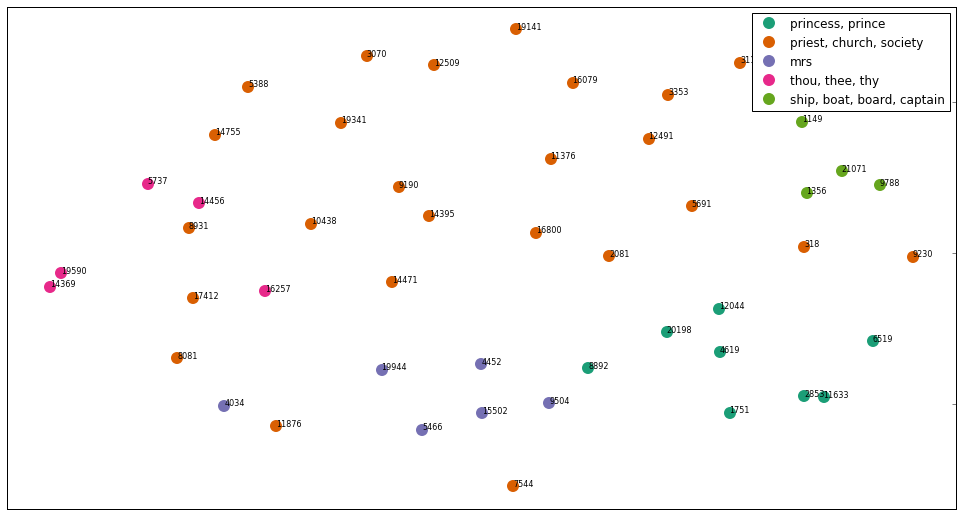

In [56]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)